In [9]:
import numpy as np
from lattice_class import *
from hamiltonian_constructor_class import *
import scipy.linalg
import matplotlib.pyplot as plt

plt.rcParams["figure.dpi"] = 150
plt.rcParams["savefig.dpi"] = 150

# 1. Create Lattice

[54, 53, 52, 51, 50, 49]
[6, 13, 20, 27, 34, 41]
[(54, 6), (53, 13), (52, 20), (51, 27), (50, 34), (49, 41)]
[(54, 6), (53, 13), (52, 20), (51, 27), (50, 34), (49, 41)]
[44, 56, 58, 70]
[0, 3, 1, 2]
neighbour 44 has local bond idx 0
neighbour 56 has local bond idx 3
neighbour 58 has local bond idx 1
neighbour 70 has local bond idx 2


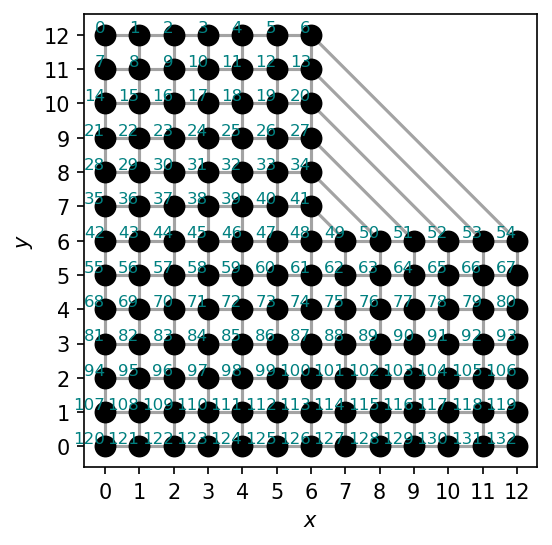

In [10]:
phase_geom = 1j
phase_vortex = -1
codim = 1

N = 13
lattice = SquareLattice(N, "open")

# lattice.add_bonds(
#     [(N // 2 + i * N - 2, N // 2 * N + N - 1 - i) for i in range(N // 2)],
#     [(2, 0) for i in range(N // 2)],
# )
lattice.remove_sites(
    [(i * N + j) for i in range(N // 2) for j in range(N // 2 + N % 2, N)]
)
print([(N // 2 + N % 2) ** 2 + N // 2 - (i + 1) for i in range(N // 2)])
print([i * (N // 2 + N % 2) + (N // 2 + N % 2) - 1 for i in range(N // 2)])

flagged_bonds_geom = lattice.glue_bond(
    [(N // 2 + N % 2) ** 2 + N // (1 + N % 2) - (i + 1) for i in range(N // 2)],
    [i * (N // 2 + N % 2) + (N // 2 + N % 2) - 1 for i in range(N // 2)],
    (3, 1),
    codim=codim,
)

flagged_bonds_vortex = flagged_bonds_geom
# print("Flagged bonds for geometric phase = ", flagged_bonds_geom)
# print("Flagged bonds for vortex phase = ", flagged_bonds_vortex)


# ctr = 0
# for i in range(N // 2):
#     for j in range(N // 2+1, N):
#         lattice.remove_site(i * N + j - ctr)
#         ctr += 1

# flagged_edges = []
# for i in range(N // 2):
#     lattice.add_edge(
#         (i * (N // 2 + 1) + N // 2, (N // 2) * (N // 2 + 1) + N - (i + 1)), (2, 0)
#     )
#     # flagged_edges.append(((N // 2) * (N // 2 + 1) + N - (i + 1), (N // 2 + 2) * (N // 2 + 1) + N - (i + 2)))

# for i in range(N // 2 + 1):
#     flagged_edges.append(((N // 2 + 1)**2 + i * N - 1, (N // 2 + 1)**2 + i * N))

# change to t_y
# apply phase to orthogonal edge to cut

# flagged_edges = [
#     (i, i + 1) for i in range((N // 2 + 1) * (N // 2) + 1, (N // 2 + 2) * (N // 2))
# ]

# flagged_edges = [(19, 32), (14, 33), (9, 34), (4, 35)]

# flagged_edges = [(47, 36), (48, 37), (49, 38), (50, 39), (51, 40)]

# flagged_edges = [(23, 24), (18, 19), (13, 14), (8, 9), (3, 4)]
# flagged_edges = [(51, 52), (62, 63), (73, 74), (84, 85)]
# print(flagged_edges)


# flagged_bonds = [
#     (49, 56),
#     (50, 57),
#     (51, 58),
#     (52, 59),
#     (53, 60),
#     (54, 61),
#     (55, 62),
# ]

lattice_sites = lattice.get_sites()
lattice_bonds = lattice.get_bonds()
num_sites = lattice.get_num_sites()
lattice.plot(True)

local_bond_indices = lattice.get_local_bond_indices()


# flagged_bonds_geom.pop()
# flagged_bonds_vortex.pop()
print(flagged_bonds_geom)
print(flagged_bonds_vortex)

idx_of_interest = 57
print(lattice._bonds[idx_of_interest])
print(lattice._local_bond_idx[idx_of_interest])

for neigh_idx in lattice_bonds[idx_of_interest]:
    print(
        f"neighbour {neigh_idx} has local bond idx {lattice.get_local_bond_index(idx_of_interest, neigh_idx)}"
    )

geometric_phase =  1j
vortex_phase =  -1
[]
Lowest found energy:  0.07480649921105655
Index of lowest absolute energy:  265


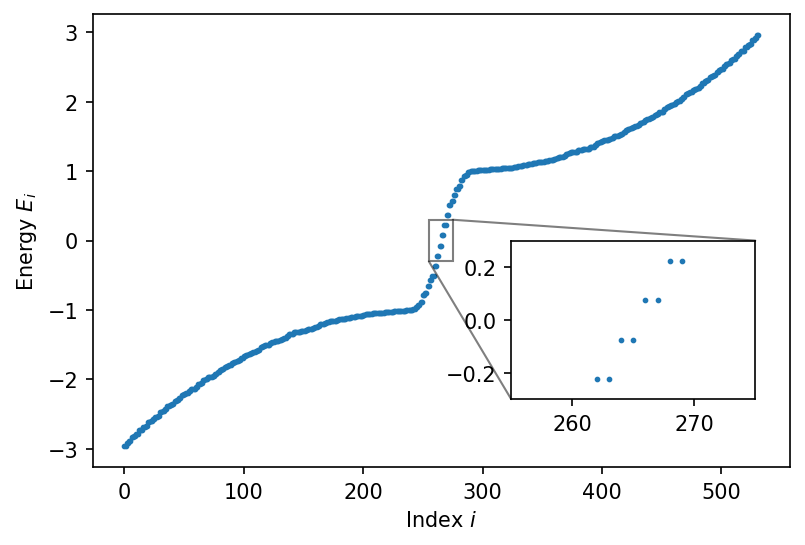

In [11]:
mu = -2
delta = complex(1.0, 0.0)
t = 1

Ham_constructor = HamiltonianConstructor(mu, t, t, delta)
H_direct_lattice = Ham_constructor.construct_direct_lattice_hamiltonian(lattice)
block_indices = Ham_constructor.get_block_indices(lattice.get_num_sites())

print("geometric_phase = ", phase_geom)
print("vortex_phase = ", phase_vortex)

for flagged_bond in flagged_bonds_geom:
    Ham_constructor.add_phase(H_direct_lattice, flagged_bond, phase_geom, num_sites)

for flagged_bond in flagged_bonds_vortex:
    Ham_constructor.add_phase(H_direct_lattice, flagged_bond, phase_vortex, num_sites)

energies, states = scipy.linalg.eigh(H_direct_lattice)

tol = 0.05
low_energy_indices = np.argwhere(np.abs(energies) < tol)[:, 0]
print(low_energy_indices)

print("Lowest found energy: ", np.min(np.abs(energies)))
gs_idx = np.argmin(np.abs(energies))
print("Index of lowest absolute energy: ", gs_idx)

# Energy scatter plot with zoom window
fig, ax = plt.subplots()
plt.xlabel(r"Index $i$")
plt.ylabel(r"Energy $E_{i}$")
ax.scatter(range(len(energies)), energies, s=3)
axins = ax.inset_axes([0.6, 0.15, 0.35, 0.35])
axins.scatter(range(len(energies)), energies, s=3, zorder=-100)
x1, x2, y1, y2 = gs_idx - 10, gs_idx + 10, -0.3, 0.3
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
ax.indicate_inset_zoom(axins, edgecolor="black")
plt.savefig(f"./plots/discl_codim_{codim}_spectrum_n_{phase_vortex}.svg")
plt.show()

Index = 265


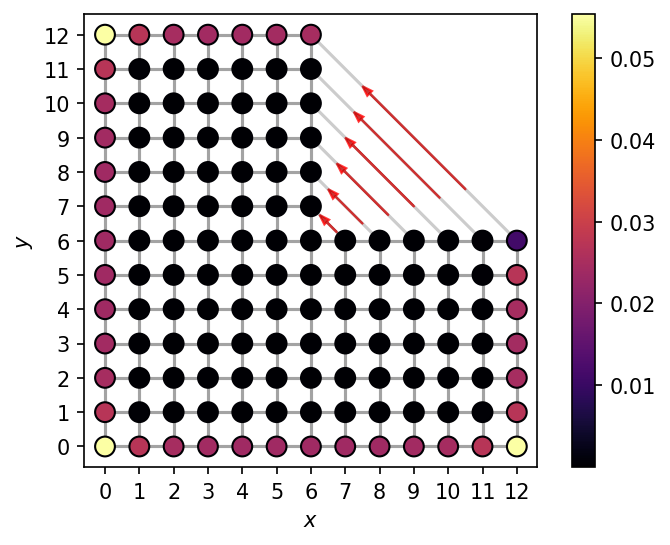

In [12]:
for gs_idx in range(gs_idx, gs_idx + 1):
    print("Index =", gs_idx)
    gs_wave_function = states[:, gs_idx]
    gs_probabilities_nambu = np.square(np.abs(gs_wave_function))
    gs_probabilities = np.zeros(shape=(num_sites, 1))

    for site_idx in range(num_sites):
        gs_probabilities[site_idx] = np.sum(
            gs_probabilities_nambu[block_indices[site_idx]]
        )

    x_values = [k[0] for k in lattice_sites]
    y_values = [k[1] for k in lattice_sites]

    color_map = plt.get_cmap("inferno")
    sc = lattice.plot(
        False, c=(gs_probabilities), flagged_bonds=flagged_bonds_vortex, cmap=color_map
    )
    plt.colorbar(sc)
    plt.savefig(f"./plots/discl_codim_{codim}_prob_distr_n_{phase_vortex}.svg")
    plt.show()

## Hop phase results

### Including edge nearest to disclination
n = 0: phase  = $e^{\frac{n\pi}{2}} = 1.0$ hase Lowest found energy:  0.04159891581792905

n = 1: phase = $e^{\frac{n\pi}{2}} = 1.0i$ has Lowest found energy:  0.040238925057125174

n = -1: phase = $e^{\frac{n\pi}{2}}= -1.0i$ has Lowest found energy:  0.04023892505712552

### Excluding edge nearest to disclination
n = 0: phase  = $e^{\frac{n\pi}{2}} = 1.0$ hase Lowest found energy:  0.04159891581792905

n = 1: phase = $e^{\frac{n\pi}{2}} = 1.0i$ has Lowest found energy:  0.040297000282122006

n = -1: phase = $e^{\frac{n\pi}{2}}= -1.0i$ has Lowest found energy:  0.040297000282122006

In [13]:
half_filling_energy = np.sum(energies[0 : 2 * num_sites])
print("Half filling energy =", half_filling_energy)

Half filling energy = -416.7246765175086


### Including edge nearest to disclination
$$n=+1: -140.92351803436424$$


$$n=-1: -140.92351803436426$$


$$n=0: -141.16633516847492$$


$$n=2: -140.51117786827353$$


### Exluding edge nearest to disclination
$$n=+1: -140.98592954483732$$


$$n=-1: -140.98592954483732$$


$$n=0: -141.16633516847492$$


$$n=2: -140.66173659874394$$

n = 1: -141.10091895484103

n = -1: -141.100918954841

n = 0: -141.16633516847492

n = 0: -141.16633516847492

n = 1: -141.0729788190133

n =-1: -141.07297881901326

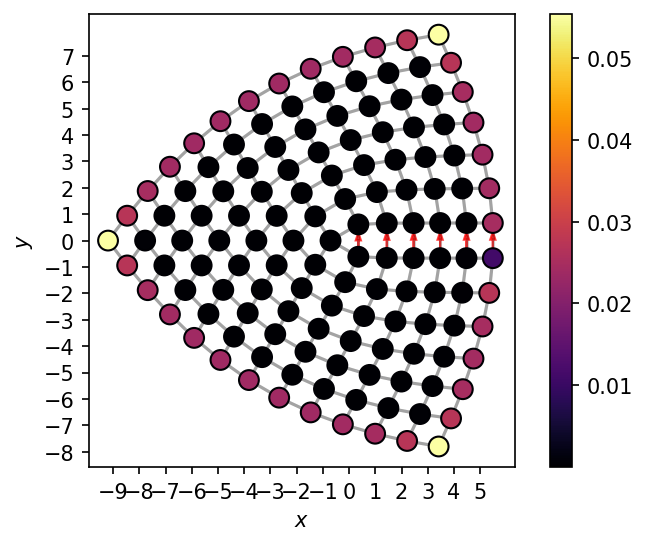

In [14]:
def transform(pos):
    defect_pos = (N / 2, N / 2)
    pos = np.array([pos[0], pos[1]])
    defect_pos = np.array([defect_pos[0], defect_pos[1]])
    pos_shift = pos - defect_pos
    x, y = pos_shift
    r = scipy.linalg.norm(pos_shift)
    angle = np.arctan2(-y, x)
    if angle < 0.0:
        angle = 2 * np.pi + angle
    angle = angle * 4 / 3
    return r * np.array([np.cos(angle), -np.sin(angle)])


for itr in range(lattice.get_num_sites()):
    lattice.move_site(itr, transform(lattice._sites[itr]))
    # lattice.move_site(itr, (lattice_sites[itr][0], -lattice_sites[itr][1]))

sc = lattice.plot(
    False, flagged_bonds=flagged_bonds_vortex, c=(gs_probabilities), cmap=color_map
)
plt.colorbar(sc)

In [15]:
print(2 * gs_probabilities[54])
print(gs_probabilities[53])
print(gs_probabilities[67])
print(gs_probabilities[6])

print(H_direct_lattice[block_indices[idx_of_interest], block_indices[idx_of_interest]])
for neigh_idx in lattice_bonds[idx_of_interest]:
    print(
        f"H({idx_of_interest}, {neigh_idx}) = ",
        H_direct_lattice[block_indices[idx_of_interest], block_indices[neigh_idx]],
    )
    print(
        f"H({neigh_idx}, {idx_of_interest}) = ",
        H_direct_lattice[block_indices[neigh_idx], block_indices[idx_of_interest]],
    )

[0.02245241]
[0.00039149]
[0.02709606]
[0.02471706]
[[ 1.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  1.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j -1.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j -1.+0.j]]
H(57, 44) =  [[-0.5+0.j  0. +0.j  0. +0.j -0.5+0.j]
 [ 0. +0.j -0.5+0.j -0.5+0.j  0. +0.j]
 [ 0. +0.j  0.5+0.j  0.5+0.j  0. +0.j]
 [ 0.5+0.j  0. +0.j  0. +0.j  0.5+0.j]]
H(44, 57) =  [[-0.5+0.j  0. +0.j  0. +0.j  0.5+0.j]
 [ 0. +0.j -0.5+0.j  0.5+0.j  0. +0.j]
 [ 0. +0.j -0.5+0.j  0.5+0.j  0. +0.j]
 [-0.5+0.j  0. +0.j  0. +0.j  0.5+0.j]]
H(57, 56) =  [[-0.5+0.j   0. +0.j   0. +0.j   0. -0.5j]
 [ 0. +0.j  -0.5+0.j   0. -0.5j  0. +0.j ]
 [ 0. +0.j   0. -0.5j  0.5+0.j   0. +0.j ]
 [ 0. -0.5j  0. +0.j   0. +0.j   0.5+0.j ]]
H(56, 57) =  [[-0.5+0.j   0. +0.j   0. +0.j   0. +0.5j]
 [ 0. +0.j  -0.5+0.j   0. +0.5j  0. +0.j ]
 [ 0. +0.j   0. +0.5j  0.5+0.j   0. +0.j ]
 [ 0. +0.5j  0. +0.j   0. +0.j   0.5+0.j ]]
H(57, 58) =  [[-0.5+0.j   0. +0.j   0. +0.j   0. +0.5j]
 [ 0. +0.j  -0.5+0.j   0. +0.5j  0. +0.